## Decision Tree, Random Forest

Data: publicly available data from [LendingClub.com](www.lendingclub.com). 

Lending Club connects people who need money (borrowers) with people who have money (investors). 

Goal: model that help investors to see if a borrower is reliable (high probability of paying back)

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

### Import libraries


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load data

In [33]:
loans = pd.read_csv('data/loan_data.csv')
print(loans.shape)
loans.head()

(9578, 14)


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [56]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [58]:
loans.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [61]:
loans['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

### Check the data

In [11]:
loans.isnull().any()

credit.policy        False
purpose              False
int.rate             False
installment          False
log.annual.inc       False
dti                  False
fico                 False
days.with.cr.line    False
revol.bal            False
revol.util           False
inq.last.6mths       False
delinq.2yrs          False
pub.rec              False
not.fully.paid       False
dtype: bool

In [174]:
s = (loans.dtypes=='object')
obj_col =  s[s].index
print(obj_col)

Index(['purpose'], dtype='object')


### Explore Data 
fico: The FICO credit score of the borrower.

credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.


Text(0.5, 0, 'fico')

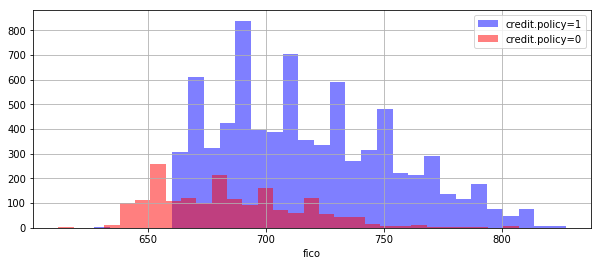

In [178]:
plt.figure(figsize=(10,4))
loans[loans['credit.policy'] == 1]['fico'].hist(color= 'blue', bins=30, alpha=0.5, label='credit.policy=1')
loans[loans['credit.policy'] == 0]['fico'].hist(color= 'red', bins=30, alpha=0.5, label='credit.policy=0')
plt.legend()
plt.xlabel('fico')

Text(0.5, 0, 'fico')

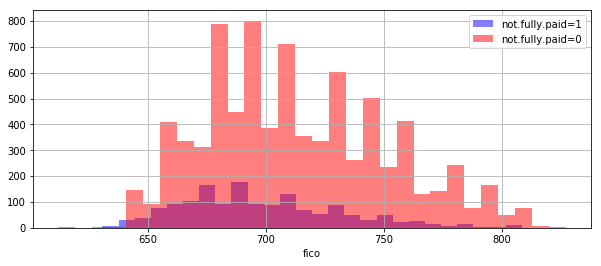

In [180]:
plt.figure(figsize=(10,4))
loans[loans['not.fully.paid'] == 1]['fico'].hist(color= 'blue', bins=30, alpha=0.5, label='not.fully.paid=1')
loans[loans['not.fully.paid'] == 0]['fico'].hist(color= 'red', bins=30, alpha=0.5, label='not.fully.paid=0')
plt.legend()
plt.xlabel('fico')

### Handling categorical column

'purpose' column is a categorical data, convert to numerical values.


In [40]:
loans[obj_col[0]].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [132]:
purpose_val = pd.get_dummies(loans['purpose'], drop_first=True)
purpose_val.head()

,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


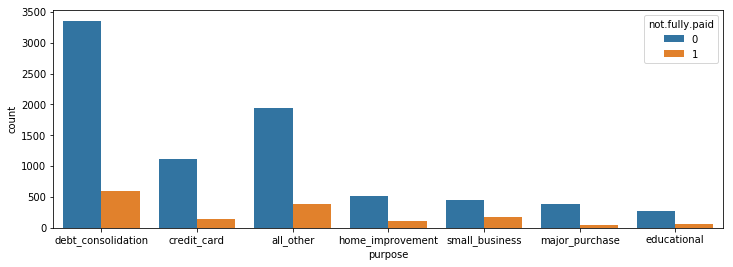

In [133]:
plt.figure(figsize=(12,4))
sns.countplot(x='purpose', data=loans, hue='not.fully.paid')

### Make Data ready
purpose categorical data droped
and numerical version of it been added.

In [167]:
loans.drop(columns=['purpose'], axis =1).shape

(9578, 13)

In [169]:
purpose_val.shape

(9578, 6)

In [172]:
data = pd.concat([loans.drop(columns=['purpose'], axis=1), purpose_val], axis=1)

In [173]:
data.shape

(9578, 19)

In [171]:
data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [62]:
X = data.drop(columns='not.fully.paid', axis=1)

y = data['not.fully.paid']

### Make the Random Forest Model

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [66]:
from sklearn.tree import DecisionTreeClassifier


In [67]:
dtree =  DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Predict

In [68]:
pred =  dtree.predict(X_test)

### Evaluate

In [100]:
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score

In [108]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[2319   89]
 [ 427   39]]


              precision    recall  f1-score   support

           0       0.84      0.96      0.90      2408
           1       0.30      0.08      0.13       466

   micro avg       0.82      0.82      0.82      2874
   macro avg       0.57      0.52      0.52      2874
weighted avg       0.76      0.82      0.78      2874



### Playing with the parameters in Decision Tree

### min_samples_split

In [76]:
from sklearn.model_selection import GridSearchCV

In [95]:
param_grid = { 'min_samples_split': [2, 5, 10, 20, 30, 50, 100]}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit=True, verbose=0, cv=3)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': [2, 5, 10, 20, 30, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [96]:
pred_bestParam = grid.predict(X_test)

In [98]:
print(confusion_matrix(y_test, pred_bestParam))
print('\n')
print(classification_report(y_test, pred_bestParam))

[[2320   88]
 [ 436   30]]


              precision    recall  f1-score   support

           0       0.84      0.96      0.90      2408
           1       0.25      0.06      0.10       466

   micro avg       0.82      0.82      0.82      2874
   macro avg       0.55      0.51      0.50      2874
weighted avg       0.75      0.82      0.77      2874



### Changing the max_depth
In general the approach allow the the tree to grow until it overfits and then prune it.

Preventing the tree from growing too deep by stopping it before it perfectly classifies the training data.

In [103]:
train_Acu =[]
test_Acu = []
index = []
for i in range(2,10):
    dtree = DecisionTreeClassifier(max_depth  = i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    train_Acu.append( accuracy_score(y_train, dtree.predict(X_train)))
    test_Acu.append(accuracy_score(y_test, pred))
    index.append(i)

[0.8408412887828163, 0.8412887828162291, 0.8447195704057279, 0.8480011933174224, 0.8544152744630071, 0.8602326968973747, 0.8675417661097852, 0.8754474940334129]
[0.83785664578984, 0.8347251217814892, 0.8361169102296451, 0.8357689631176062, 0.8305497564370216, 0.826374391092554, 0.8281141266527487, 0.8204592901878914]


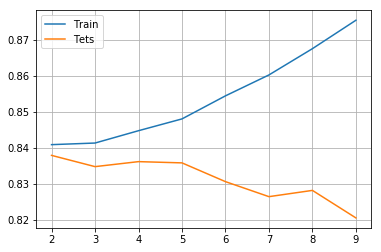

In [104]:
print(train_Acu)
print(test_Acu)
plt.plot(index, train_Acu, index, test_Acu)
plt.legend(['Train', 'Tets'])
plt.grid(b = True)

## RandomForest

In [119]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
model =RandomForestClassifier( )
model.fit(X_train, y_train)
pred = model.predict(X_test)
print('train_accuracy=%.2f' %(accuracy_score(y_train, model.predict(X_train))))
print('test_accuracy=%.2f' %(accuracy_score(y_test, pred)))

print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))
print('\n')


train_accuracy=0.98
test_accuracy=0.83
[[2363   45]
 [ 448   18]]


              precision    recall  f1-score   support

           0       0.84      0.98      0.91      2408
           1       0.29      0.04      0.07       466

   micro avg       0.83      0.83      0.83      2874
   macro avg       0.56      0.51      0.49      2874
weighted avg       0.75      0.83      0.77      2874





C:\Users\FirouzehPC\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [127]:
model =RandomForestClassifier(n_estimators=10,max_features=5 )
model.fit(X_train, y_train)
pred = model.predict(X_test)
print('train_accuracy=%.2f' %(accuracy_score(y_train, model.predict(X_train))))
print('test_accuracy=%.2f' %(accuracy_score(y_test, pred)))
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

train_accuracy=0.98
test_accuracy=0.83
[[2359   49]
 [ 444   22]]


              precision    recall  f1-score   support

           0       0.84      0.98      0.91      2408
           1       0.31      0.05      0.08       466

   micro avg       0.83      0.83      0.83      2874
   macro avg       0.58      0.51      0.49      2874
weighted avg       0.76      0.83      0.77      2874

